<a href="https://colab.research.google.com/github/anhhaibkhn/LeetCode_Daily_Challenges/blob/master/OctLeetCodePart2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

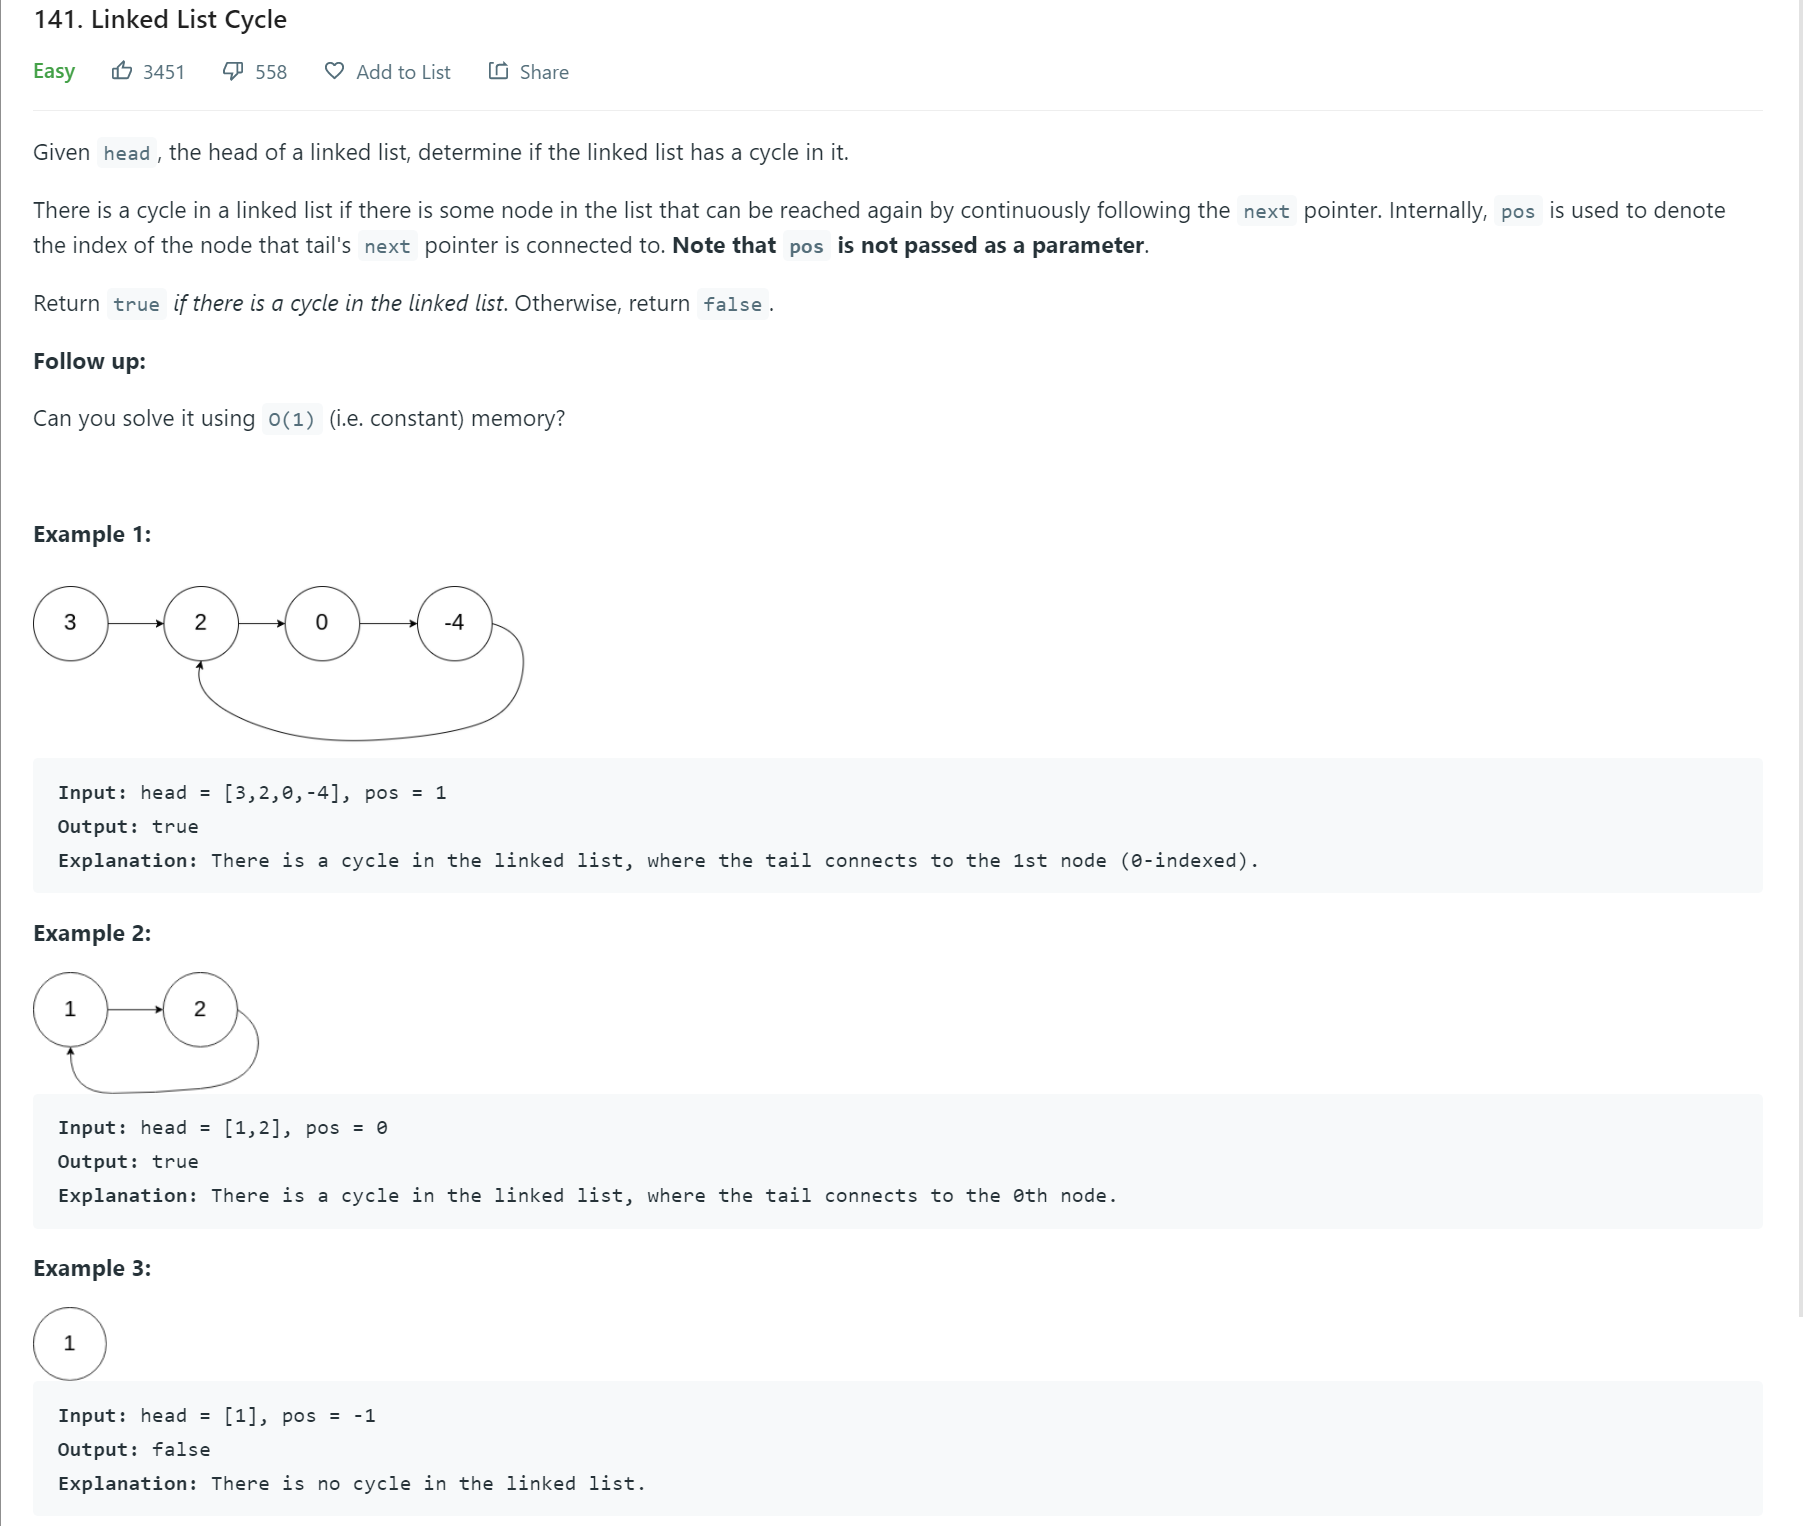

In [ ]:
# Constraints:

# The number of the nodes in the list is in the range [0, 104].
# -105 <= Node.val <= 105
# pos is -1 or a valid index in the linked-list.

''' Linked list Cycle Review 
        
        Consider the following linked list, where E is the cylce entry and X, the crossing point of fast and slow.
        H: distance from head to cycle entry E
        D: distance from E to X
        L: cycle length
                          _____
                         /     \
        head_____H______E       \
                        \       /
                         \__X__/   
        
        The slow pointer move by one node, the fast pointer moves by 2 node. if there is a circle, the fast pointer will eventually catches the slow pointer at X. 
    
'''
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, x):
#         self.val = x
#         self.next = None

class Solution:
    def hasCycle(self, head: ListNode) -> bool:
        slow, fast = head, head
        while fast and fast.next:
            slow = slow.next
            fast = fast.next.next
            if slow == fast:
                return True
        return False



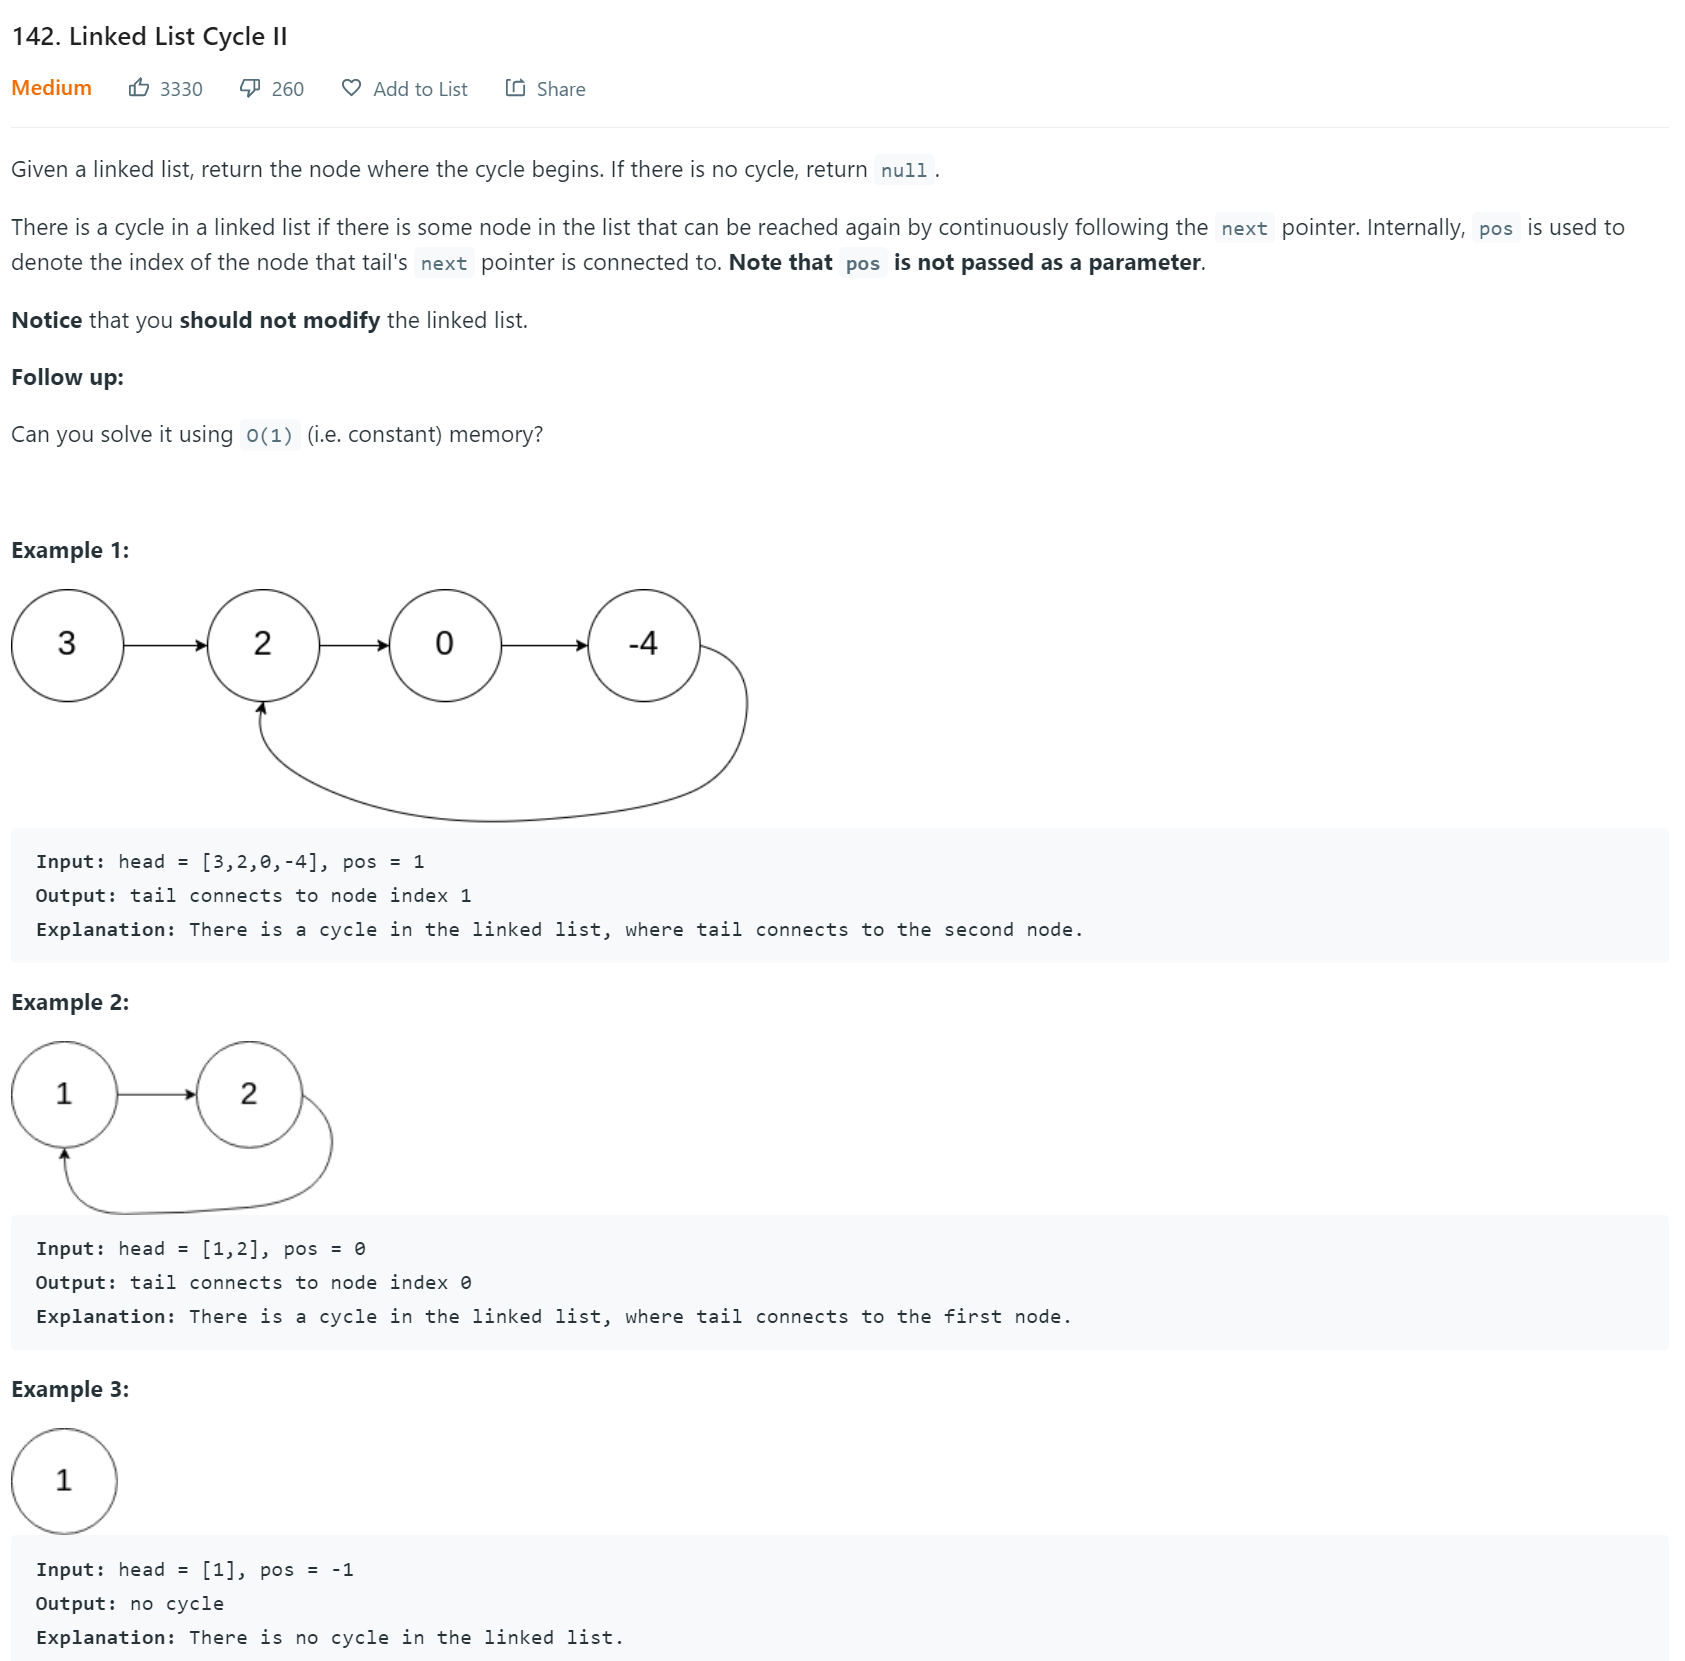

In [ ]:
# Constraints:

# The number of the nodes in the list is in the range [0, 104].
# -105 <= Node.val <= 105
# pos is -1 or a valid index in the linked-list.


''' Leetcode Challenge Oct 28th Linked List Cycle 2 
        Consider the following linked list, where E is the cylce entry and X, the crossing point of fast and slow.
        H: distance from head to cycle entry E
        D: distance from E to X
        L: cycle length
                          _____
                         /     \
        head_____H______E       \
                        \       /
                         \__X__/   
        
    
        If fast and slow both start at head, when fast catches slow, slow has traveled H+D and fast 2(H+D). 
        Assume fast has traveled n loops in the cycle, we have:
        2H + 2D = H + D + nL  -->  H + D = nL  --> H = nL - D
        Thus if two pointers start from head and X, respectively, one first reaches E, the other also reaches E. 
'''

# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, x):
#         self.val = x
#         self.next = None

class Solution:
    def detectCycle(self, head: ListNode) -> ListNode:
        fast, slow = head, head
        while fast and fast.next:
            slow = slow.next
            fast = fast.next.next
            # found a cirlce, when fast catches slow
            if slow == fast:
                # go from head again 
                slow2 = head
                while slow2 != slow:
                    slow = slow.next
                    slow2 = slow2.next
                return slow2
            
        return None


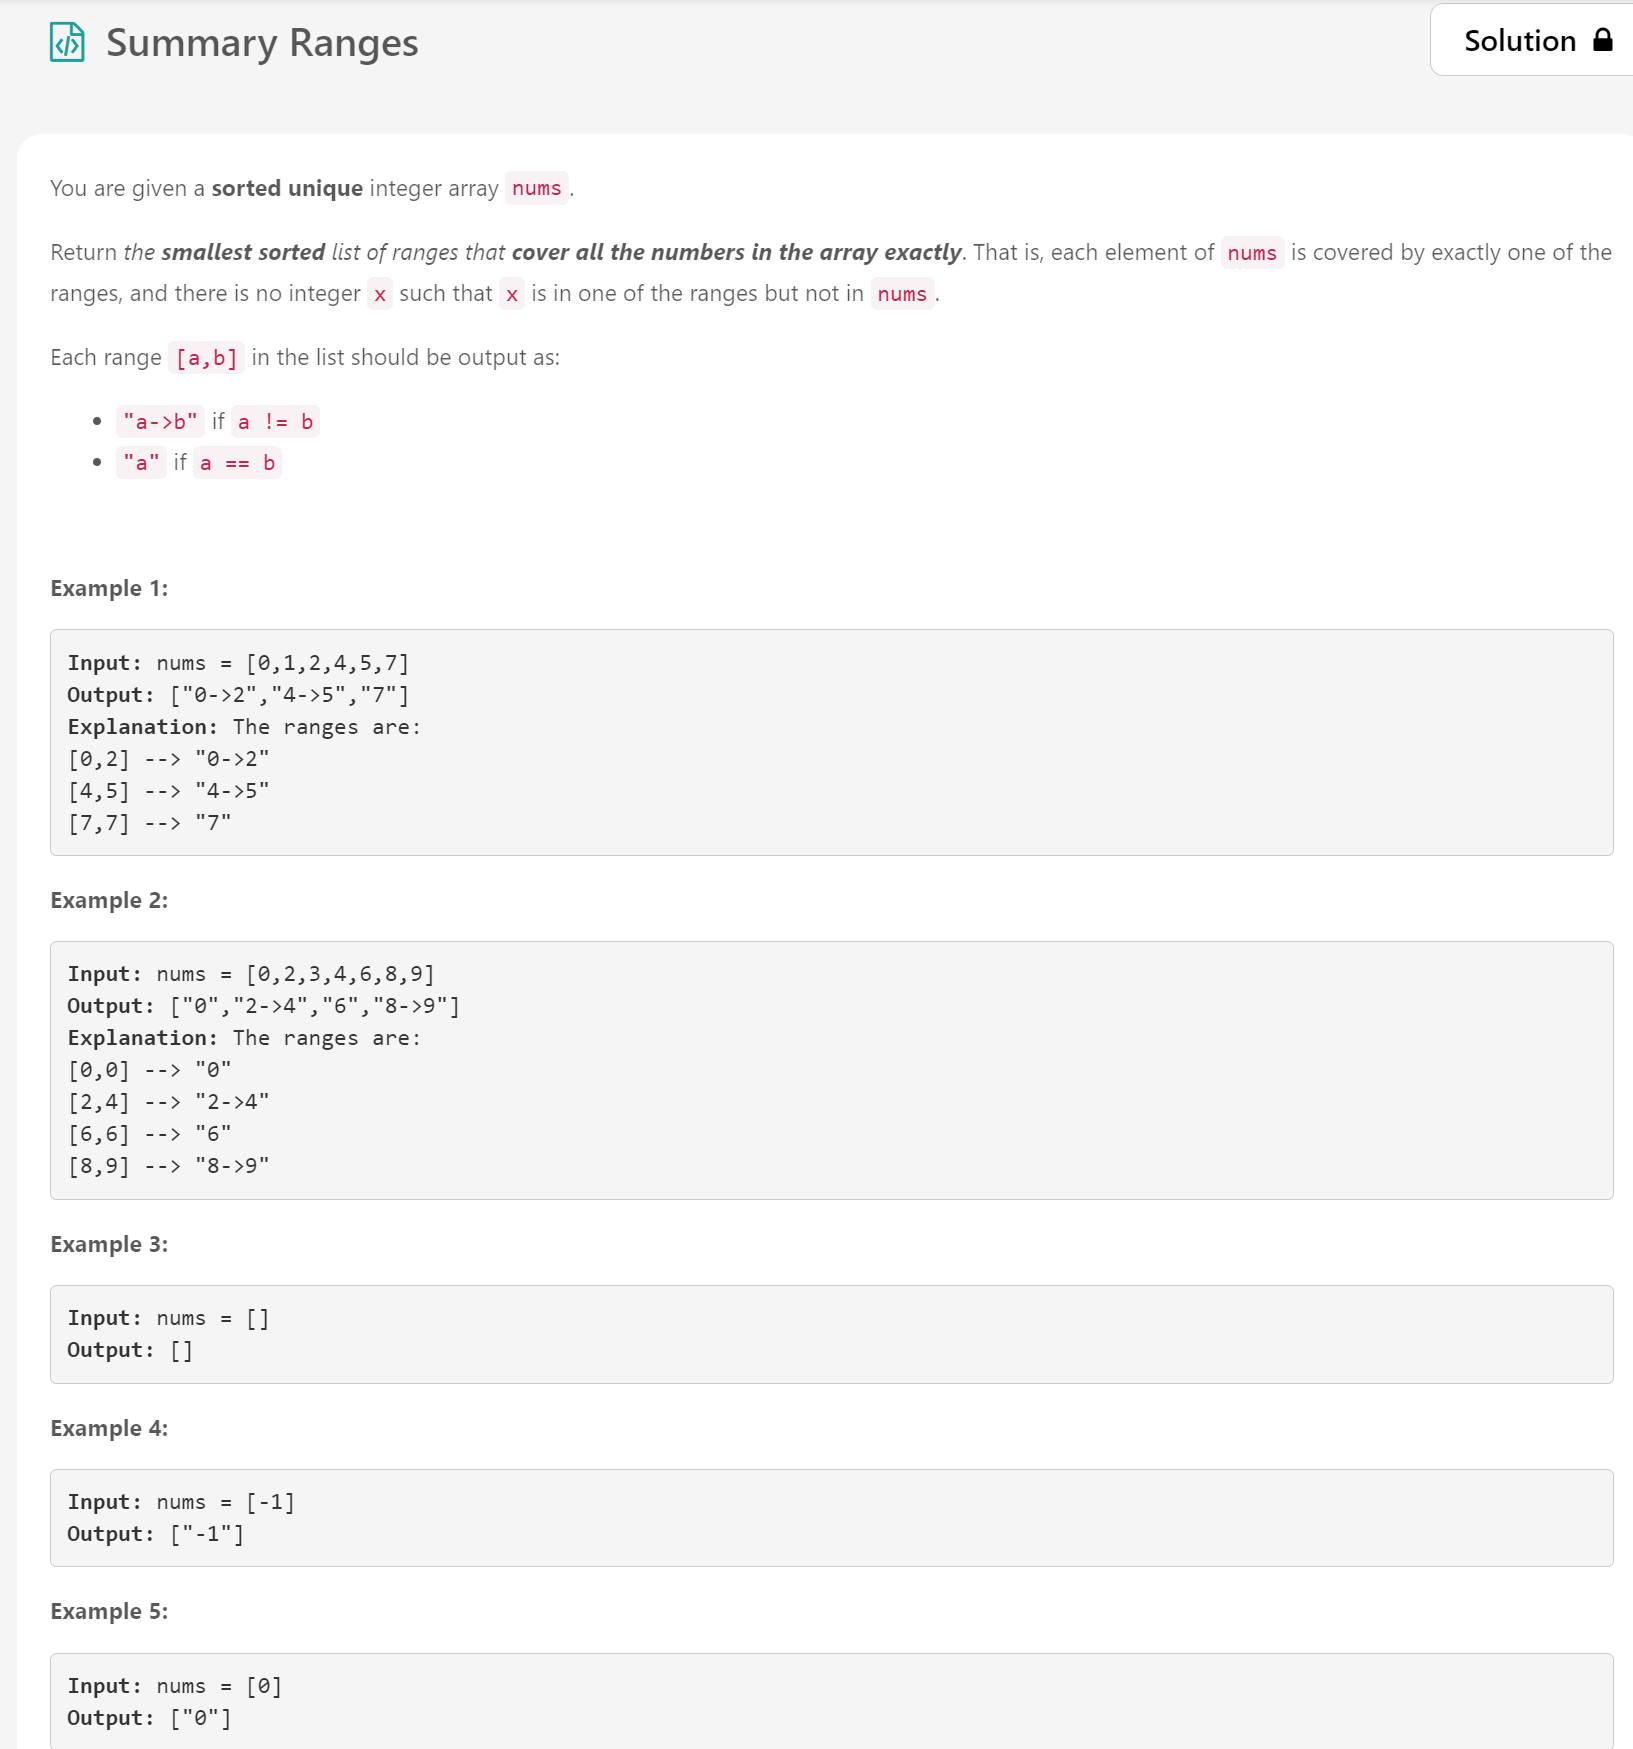

In [ ]:
''' Leetcode Challenge Oct 28 Summary Range 

Constraints:

0 <= nums.length <= 20
-231 <= nums[i] <= 231 - 1
All the values of nums are unique.

'''
# My solution 
class Solution:
    def summaryRanges(self, nums: List[int]) -> List[str]:
        my_dic = defaultdict(int)
        ret = []
        if nums:
            prev, key  = nums[0],nums[0]
            for num in nums:
                if num == prev+1:
                    my_dic[key].append(num)
                else:
                    key = num
                    my_dic[key] = [num]
                prev = num

            for key, value in my_dic.items():
                if key != value[-1]:
                    ret.append((str(key) + '->' + str(value[-1])))
                else:
                    ret.append(str(key))
                
        return ret


# fastest submission
# https://leetcode.com/explore/challenge/card/october-leetcoding-challenge/562/week-4-october-22nd-october-28th/3510/discuss/63193/6-lines-in-Python


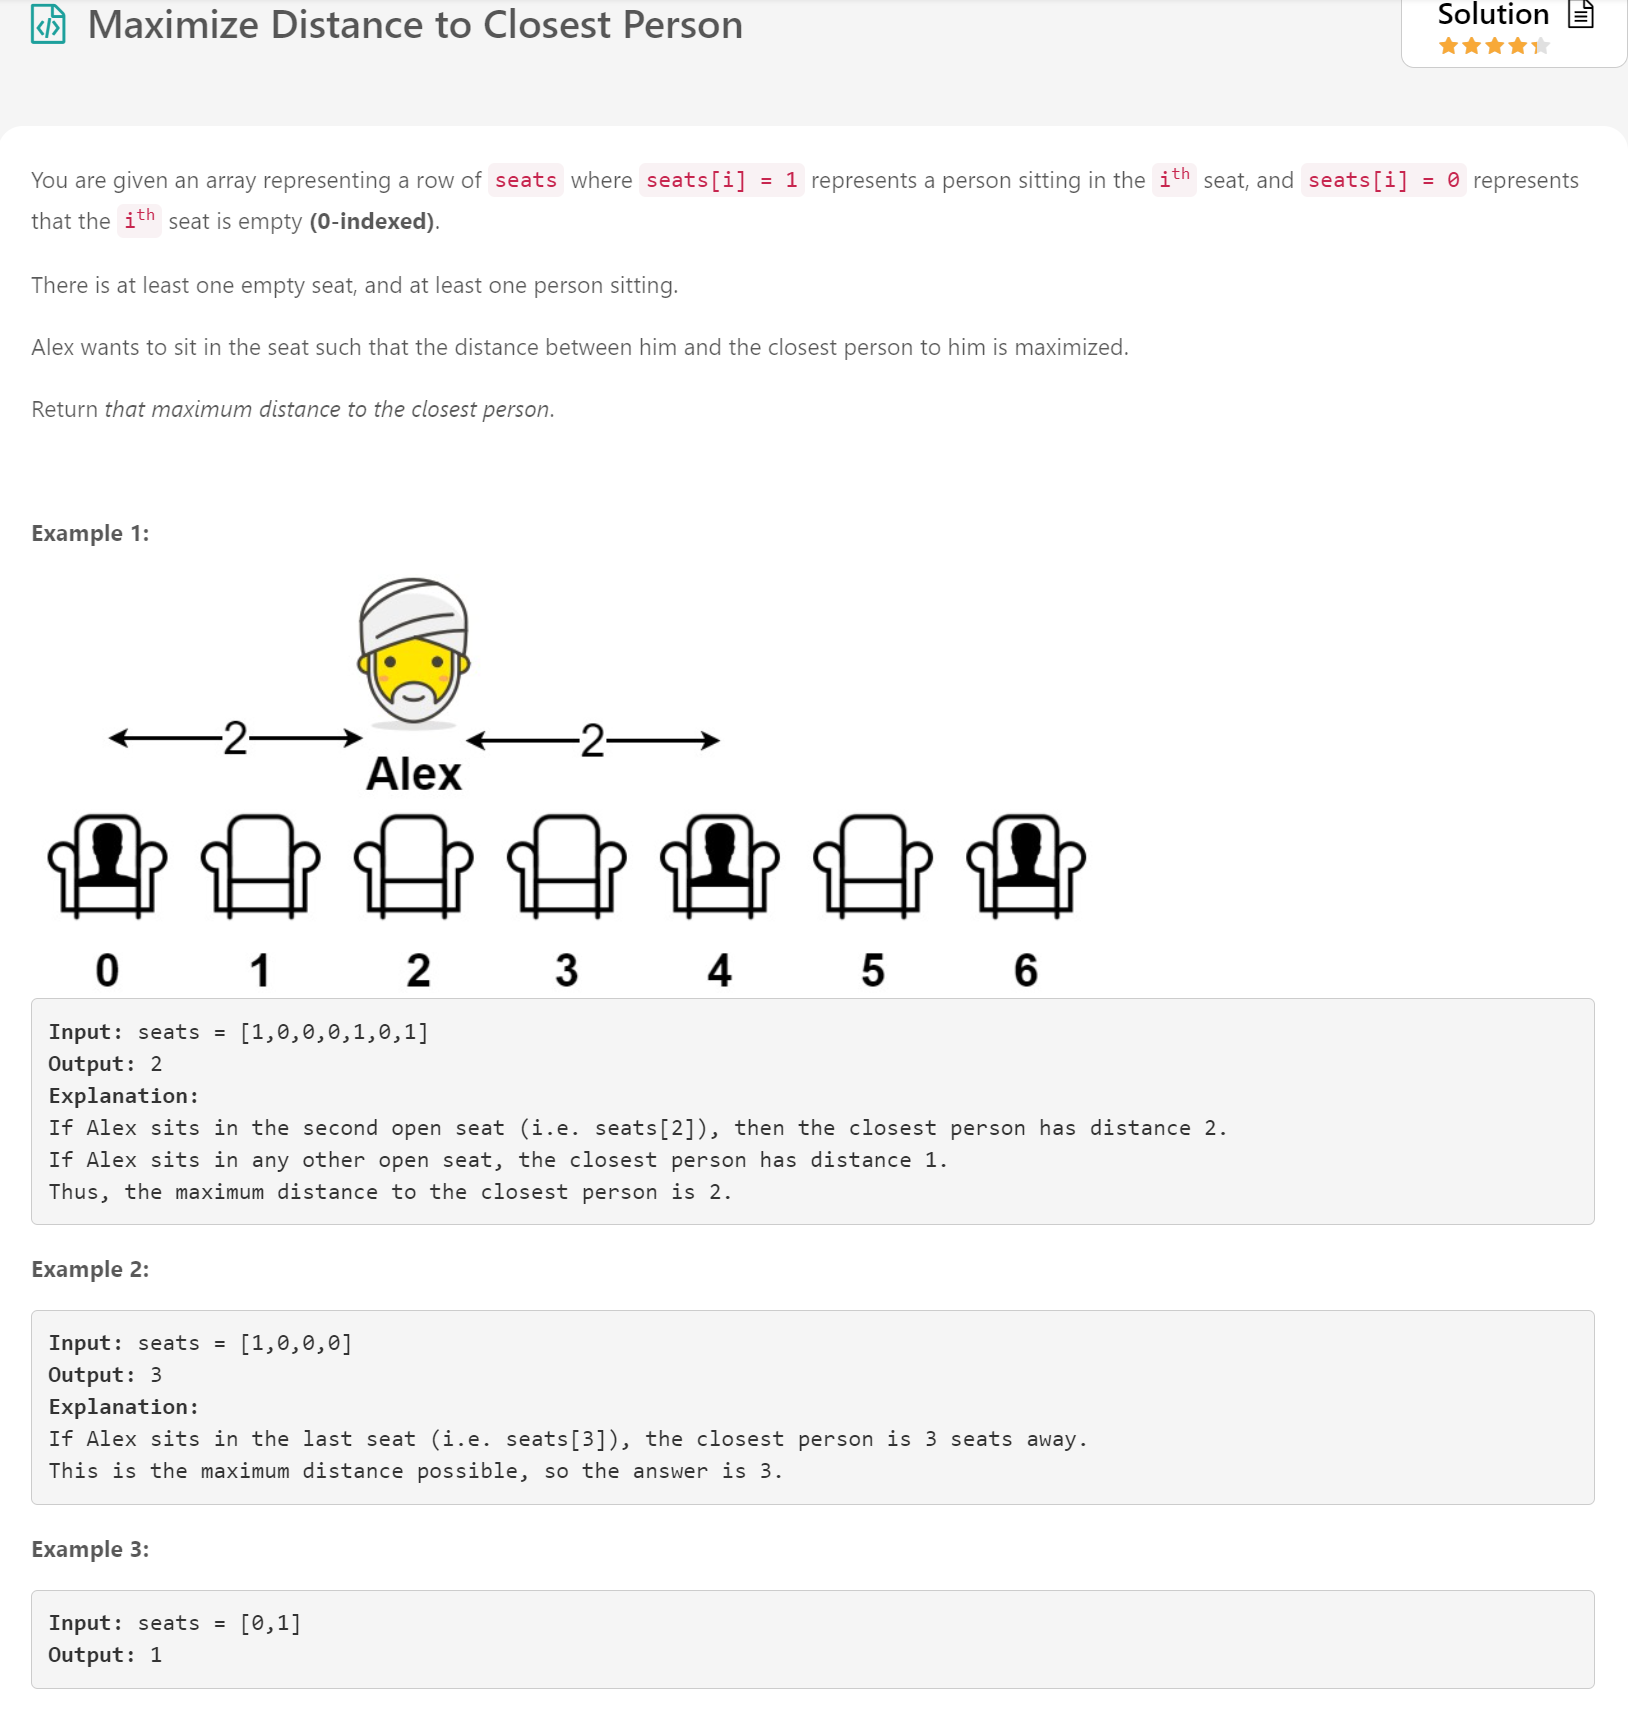

In [ ]:
'''leetcode challenge Oct 29th Maximize Distance to Closest Person

'''


# my solution faster than 82%
import math
class Solution:
    def maxDistToClosest(self, seats: List[int]) -> int:
        max_d = 1
        arr = []
        tmp_str = ''
        while seats:
            seat = seats.pop()
            if seat == 0:
                tmp_str += str(seat)
            if seat == 1:
                if not tmp_str:
                    tmp_str += str(seat)
                elif tmp_str[-1] != '1':
                    tmp_str += str(seat)
                    arr.append(tmp_str)
                    tmp_str = '1'
        
        if tmp_str != '1':
            arr.append(tmp_str)
            
        for s in arr:
            if s[0] == '0' or s[-1] == '0':
                if len(s) - 1 > max_d:
                    max_d = len(s) - 1
            else: 
                if len(s)-2 > max_d * 2:
                    max_d = math.ceil((len(s)-2)/2)
            
            
        return max_d


# fastest submission 

class Solution:
    def maxDistToClosest(self, seats: List[int]) -> int:
        
        prev = None
        diff = 0
        result = -1
        
        n = len(seats)
        for i in range(n):
            if seats[i]:
                if prev is None:
                    prev = i
                    left = i
                elif i-prev > diff:
                    diff = i-prev
                    result = diff // 2
                prev = i
        
        right = n - prev - 1
        
        return max(left, right, result)

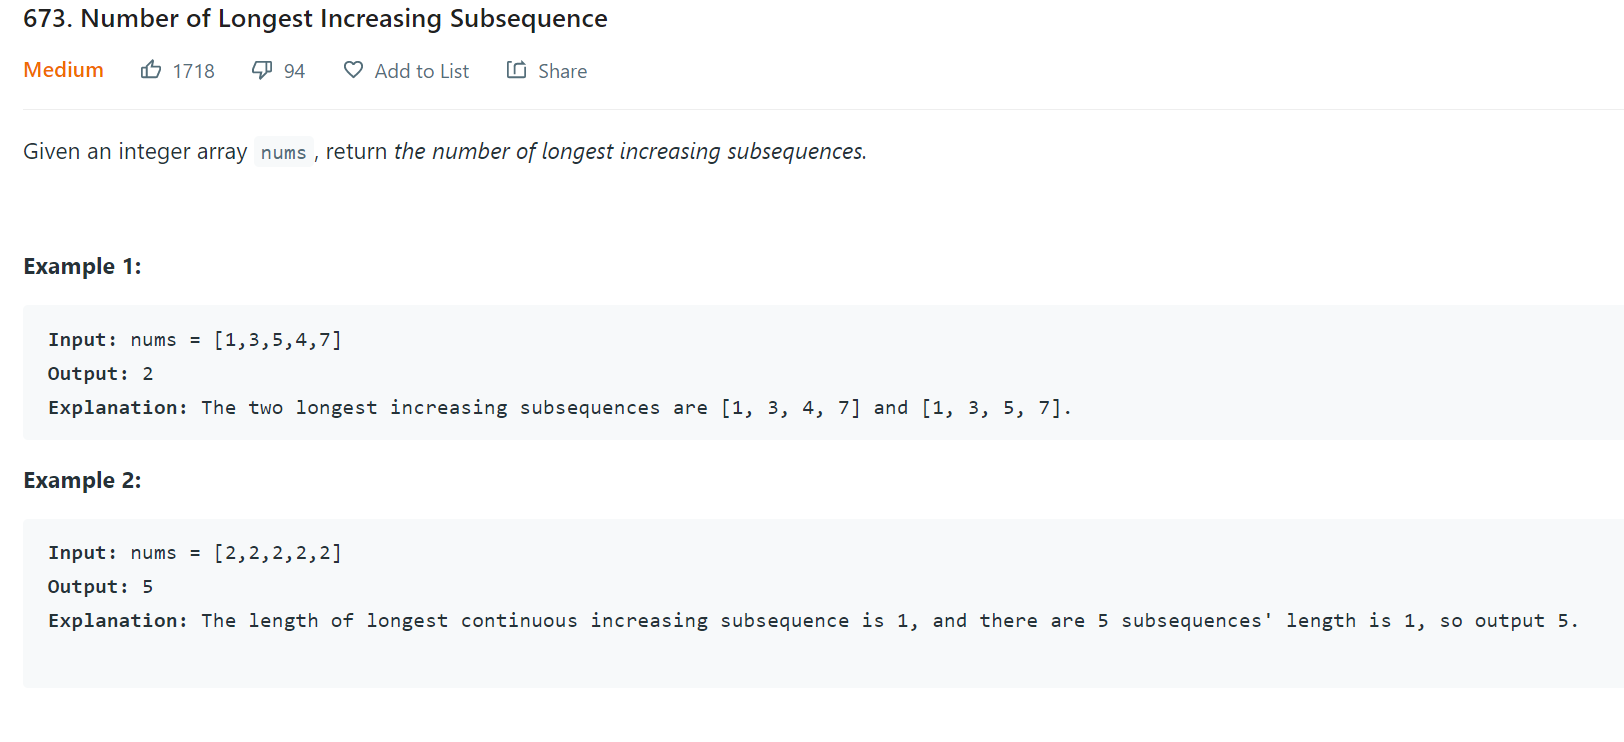

In [ ]:
''' Oct 30th  Number of Longest Increasing Subsequence 

'''
# convert from Java code <too slow>
class Solution:
    def findNumberOfLIS(self, nums: List[int]) -> int:
        L = len(nums)
        result, max_len = 0, 0
        
        len_arr = [0] * L
        count_arr = [0] * L
        
        for i in range(L):
            len_arr[i], count_arr[i] = 1,1
            for j in range(i):
                if nums[i] > nums[j]:
                    if len_arr[i] == len_arr[j] + 1:
                        count_arr[i] += count_arr[j]
                    
                    if len_arr[i] < len_arr[j] + 1:
                        len_arr[i] = len_arr[j] + 1
                        count_arr[i] = count_arr[j]
                        
            if max_len == len_arr[i]:
                result += count_arr[i]
            if max_len < len_arr[i]:
                max_len = len_arr[i]
                result = count_arr[i]
        
        return result

# DP
class Solution(object):
    def findNumberOfLIS(self, nums):
        N = len(nums)
        if N <= 1: return N
        lengths = [0] * N #lengths[i] = longest ending in nums[i]
        counts = [1] * N #count[i] = number of longest ending in nums[i]

        for j, num in enumerate(nums):
            for i in xrange(j):
                if nums[i] < nums[j]:
                    if lengths[i] >= lengths[j]:
                        lengths[j] = 1 + lengths[i]
                        counts[j] = counts[i]
                    elif lengths[i] + 1 == lengths[j]:
                        counts[j] += counts[i]

        longest = max(lengths)
        return sum(c for i, c in enumerate(counts) if lengths[i] == longest)



# fastest submisison
class Solution:
    def findNumberOfLIS(self, nums):
        if not nums: return 0
    
        decks, ends_decks, paths = [], [], []
        for num in nums:
            deck_idx = bisect.bisect_left(ends_decks, num)
            n_paths = 1
            if deck_idx > 0:
                l = bisect.bisect(decks[deck_idx-1], -num)
                n_paths = paths[deck_idx-1][-1] - paths[deck_idx-1][l]
                
            if deck_idx == len(decks):
                decks.append([-num])
                ends_decks.append(num)
                paths.append([0,n_paths])
            else:
                decks[deck_idx].append(-num)
                ends_decks[deck_idx] = num
                paths[deck_idx].append(n_paths + paths[deck_idx][-1])
                
            #print(decks)
            #print(paths)
            #print("@@@@@")
                
        return paths[-1][-1]


# binary search 

class Solution:
    def findNumberOfLIS(self, nums: List[int]) -> int:
        if not nums: return 0
        dp, j = [], 0
        for num in nums:
            l, r = 0, j
            while l < r:
                mid = (l+r)//2
                if min(dp[mid].keys()) < num:
                    l = mid + 1
                else: r = mid
            if l == j:
                j += 1
                dp.append({})
            if l == 0:
                dp[l][num] = dp[l].get(num, 0) + 1
            else: 
                dp[l][num] = dp[l].get(num, 0) + sum(dp[l-1][k] for k in dp[l-1] if k < num)
        return sum(dp[-1].values())